In [2]:
import pandas as pd
import numpy as np
import os
from google.cloud import vision
import re

In [3]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] ='vision_key.json'

In [4]:
df=pd.read_csv("ewg_data.csv")

In [5]:
df.head(20)

,Product Name,Product Score,Cancer Concern,Allergies & Immunotoxicity,Developmental and Reproductive Toxicity,Use Restrictions,Other Concerns
0,WATER,1,LOW,LOW,LOW,LOW,NaN
1,FRAGRANCE,8,LOW,HIGH,LOW,LOW,"Endocrine disruption (moderate), Non-reproduct..."
2,GLYCERIN,1,LOW,LOW,LOW,MODERATE,Use restrictions (moderate)
3,PHENOXYETHANOL,2,LOW,LOW,LOW,MODERATE,"Use restrictions (moderate), Non-reproductive ..."
4,IRON OXIDES,3,LOW,LOW,LOW,LOW,"Enhanced skin absorption, Persistence and bioa..."
5,TITANIUM DIOXIDE,1,MODERATE,LOW,LOW,LOW,Non-reproductive organ system toxicity (modera...
6,TOCOPHEROL,1,LOW,LOW,LOW,LOW,Endocrine disruption (low) and Contamination c...
7,MICA,2,LOW,LOW,LOW,LOW,Persistence and bioaccumulation (high) and Non...
8,CITRIC ACID,1,LOW,LOW,LOW,MODERATE,Use restrictions (moderate)
9,TOCOPHERYL ACETATE,2,LOW,MODERATE,LOW,LOW,Contamination concerns (high)


In [6]:
df.shape

(6000, 7)

In [7]:
df.isnull().sum()

Product Name                                  0
Product Score                                 0
Cancer Concern                                0
Allergies & Immunotoxicity                    0
Developmental and Reproductive Toxicity       0
Use Restrictions                              0
Other Concerns                             3757
dtype: int64

In [8]:
def detect_text(path):
    """Detects text in the file."""
    
    # Initialize a client for the Google Cloud Vision API
    client = vision.ImageAnnotatorClient()
    
    with open(path, "rb") as image_file:
        content = image_file.read()
    
    # Create a vision.Image object using the image content
    image = vision.Image(content=content)
    
    # Send the image content to the Google Cloud Vision API for text detection
    response = client.document_text_detection(image=image)
    
    # Retrieve the detected text annotations from the API response
    texts = response.text_annotations
    
    ocr_text = []
    
    # Loop through each detected text annotation
    for text in texts:
        # Append the description (text content) of each annotation to the ocr_text list
        ocr_text.append(f"\r\n{text.description}")
    
    # Check for errors in the API response
    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )
    
    return ocr_text

In [9]:
image_path = "p10.jpg"
ocr_text = detect_text(image_path)
print(ocr_text)

['\r\nwww.makeupandbeautytreasure.com lemon fresh\nEffectively removes dandruff and prevents it from\ncoming back*\n*visible flakes only, with regular use\nfresh, fragrant clean\nThis formula with citrus fragrance, cleanses away oil and\ndirt leaving hair feeling light, fresh and fragrant.\nDIRECTIONS: Shake before use. Wet hair. Gently massage\nonto scalp. Lather and rinse thoroughly. Repeat if desired.\nCAUTION: Avoid contact with eyes. If this happens, rinse\nthoroughly with water.\nIngredients: Water, Sodium Lauryl Sulfate, Sodium Laureth\nSulfate, Sodium Chloride, Glycol Distearate, Zinc Carbonate,\nSodium Xylenesulfonate, Cocamidopropyl Betaine,\nZinc Pyrithione, Fragrance, Dimethicone, Sodium Benzoate,\nGuar Hydroxypropyltrimonium Chloride, Magnesium Carbonate\nHydroxide, Hexyl Cinnamal, Limonene, Benzyl Salicylate, Citronellol,\nAmyl Cinnamal, Citrus Limon (Lemon) Fruit Extract,\nMethylchloroisothiazolinone, Methylisothiazolinone, CI 19140, CI 42090.\nManufactured by Procter & 

In [10]:
ocr_text[0] = ocr_text[0].upper()
# Replace line breaks with spaces to create a single paragraph
ocr_text[0] = ocr_text[0].replace('\n', ' ')
print(ocr_text[0])

 WWW.MAKEUPANDBEAUTYTREASURE.COM LEMON FRESH EFFECTIVELY REMOVES DANDRUFF AND PREVENTS IT FROM COMING BACK* *VISIBLE FLAKES ONLY, WITH REGULAR USE FRESH, FRAGRANT CLEAN THIS FORMULA WITH CITRUS FRAGRANCE, CLEANSES AWAY OIL AND DIRT LEAVING HAIR FEELING LIGHT, FRESH AND FRAGRANT. DIRECTIONS: SHAKE BEFORE USE. WET HAIR. GENTLY MASSAGE ONTO SCALP. LATHER AND RINSE THOROUGHLY. REPEAT IF DESIRED. CAUTION: AVOID CONTACT WITH EYES. IF THIS HAPPENS, RINSE THOROUGHLY WITH WATER. INGREDIENTS: WATER, SODIUM LAURYL SULFATE, SODIUM LAURETH SULFATE, SODIUM CHLORIDE, GLYCOL DISTEARATE, ZINC CARBONATE, SODIUM XYLENESULFONATE, COCAMIDOPROPYL BETAINE, ZINC PYRITHIONE, FRAGRANCE, DIMETHICONE, SODIUM BENZOATE, GUAR HYDROXYPROPYLTRIMONIUM CHLORIDE, MAGNESIUM CARBONATE HYDROXIDE, HEXYL CINNAMAL, LIMONENE, BENZYL SALICYLATE, CITRONELLOL, AMYL CINNAMAL, CITRUS LIMON (LEMON) FRUIT EXTRACT, METHYLCHLOROISOTHIAZOLINONE, METHYLISOTHIAZOLINONE, CI 19140, CI 42090. MANUFACTURED BY PROCTER & GAMBLE HOME PRODUCTS LTD

In [11]:
# Split the text into lines
#ocr_lines = ocr_text[0].split('\n')
#print(ocr_lines)

In [14]:
# Initialize a flag to track if we are in the ingredients section
in_ingredients_section = False

# List to store individual words in the ingredients section
ingredient_words = []

# Iterate through each line
#for line in ocr_lines:

if 'INGREDIENTS' in ocr_text[0]:
    in_ingredients_section = True
    # Split the line by 'Ingredients:' and take the second part
    line = ocr_text[0].split('INGREDIENTS')[1].strip()
    line=line.replace(":","")

if in_ingredients_section and '.' in line:
    line = line.split('.')[0].strip()
    ingredient_words.extend([word.strip() for word in line.split(',')])  # Split only at commas


if in_ingredients_section:
    ingredient_words.extend([word.strip() for word in line.split(',')])  # Split only at commas

print(ingredient_words)

['WATER', 'SODIUM LAURYL SULFATE', 'SODIUM LAURETH SULFATE', 'SODIUM CHLORIDE', 'GLYCOL DISTEARATE', 'ZINC CARBONATE', 'SODIUM XYLENESULFONATE', 'COCAMIDOPROPYL BETAINE', 'ZINC PYRITHIONE', 'FRAGRANCE', 'DIMETHICONE', 'SODIUM BENZOATE', 'GUAR HYDROXYPROPYLTRIMONIUM CHLORIDE', 'MAGNESIUM CARBONATE HYDROXIDE', 'HEXYL CINNAMAL', 'LIMONENE', 'BENZYL SALICYLATE', 'CITRONELLOL', 'AMYL CINNAMAL', 'CITRUS LIMON (LEMON) FRUIT EXTRACT', 'METHYLCHLOROISOTHIAZOLINONE', 'METHYLISOTHIAZOLINONE', 'CI 19140', 'CI 42090', 'WATER', 'SODIUM LAURYL SULFATE', 'SODIUM LAURETH SULFATE', 'SODIUM CHLORIDE', 'GLYCOL DISTEARATE', 'ZINC CARBONATE', 'SODIUM XYLENESULFONATE', 'COCAMIDOPROPYL BETAINE', 'ZINC PYRITHIONE', 'FRAGRANCE', 'DIMETHICONE', 'SODIUM BENZOATE', 'GUAR HYDROXYPROPYLTRIMONIUM CHLORIDE', 'MAGNESIUM CARBONATE HYDROXIDE', 'HEXYL CINNAMAL', 'LIMONENE', 'BENZYL SALICYLATE', 'CITRONELLOL', 'AMYL CINNAMAL', 'CITRUS LIMON (LEMON) FRUIT EXTRACT', 'METHYLCHLOROISOTHIAZOLINONE', 'METHYLISOTHIAZOLINONE', 'CI

In [60]:
elements=ingredient_words
new_elements = []

for element in elements:
    if "(AND)" in element:
        parts= element.split('(AND)')
        new_elements.extend(parts)
        
    elif '/' in element:
        parts = element.split('/')
        new_elements.extend(parts)
        
    else:
        new_elements.append(element)
        
for i in range(len(new_elements)):
    new_elements[i] = new_elements[i].strip()

print(new_elements)


['WATER', 'SODIUM LAURYL SULFATE', 'SODIUM LAURETH SULFATE', 'SODIUM CHLORIDE', 'GLYCOL DISTEARATE', 'ZINC CARBONATE', 'SODIUM XYLENESULFONATE', 'COCAMIDOPROPYL BETAINE', 'ZINC PYRITHIONE', 'FRAGRANCE', 'DIMETHICONE', 'SODIUM BENZOATE', 'GUAR HYDROXYPROPYLTRIMONIUM CHLORIDE', 'MAGNESIUM CARBONATE HYDROXIDE', 'HEXYL CINNAMAL', 'LIMONENE', 'BENZYL SALICYLATE', 'CITRONELLOL', 'AMYL CINNAMAL', 'CITRUS LIMON (LEMON) FRUIT EXTRACT', 'METHYLCHLOROISOTHIAZOLINONE', 'METHYLISOTHIAZOLINONE', 'CI 19140', 'CI 42090', 'WATER', 'SODIUM LAURYL SULFATE', 'SODIUM LAURETH SULFATE', 'SODIUM CHLORIDE', 'GLYCOL DISTEARATE', 'ZINC CARBONATE', 'SODIUM XYLENESULFONATE', 'COCAMIDOPROPYL BETAINE', 'ZINC PYRITHIONE', 'FRAGRANCE', 'DIMETHICONE', 'SODIUM BENZOATE', 'GUAR HYDROXYPROPYLTRIMONIUM CHLORIDE', 'MAGNESIUM CARBONATE HYDROXIDE', 'HEXYL CINNAMAL', 'LIMONENE', 'BENZYL SALICYLATE', 'CITRONELLOL', 'AMYL CINNAMAL', 'CITRUS LIMON (LEMON) FRUIT EXTRACT', 'METHYLCHLOROISOTHIAZOLINONE', 'METHYLISOTHIAZOLINONE', 'CI

In [61]:
ingredients=new_elements

In [62]:
len(ingredients)

48

In [63]:
def filter_ingredients(ingredients):
    # Filter rows based on whether the 'IngredientName' is in the ingredient list
    filtered_dataset = df[df['Product Name'].isin(ingredients)]
    
    # Reset the index of the filtered dataset
    filtered_dataset.reset_index(drop=True, inplace=True)
    
    return filtered_dataset


# Call the function to filter the dataset
ingredient_dataset = filter_ingredients(ingredients)

# Print the filtered dataset
ingredient_dataset

,Product Name,Product Score,Cancer Concern,Allergies & Immunotoxicity,Developmental and Reproductive Toxicity,Use Restrictions,Other Concerns
0,WATER,1,LOW,LOW,LOW,LOW,NaN
1,FRAGRANCE,8,LOW,HIGH,LOW,LOW,"Endocrine disruption (moderate), Non-reproduct..."
2,DIMETHICONE,2,LOW,LOW,LOW,MODERATE,"Use restrictions (moderate), Persistence and b..."
3,SODIUM CHLORIDE,1,LOW,LOW,LOW,LOW,NaN
4,SODIUM BENZOATE,1,LOW,LOW,LOW,MODERATE,Use restrictions (moderate) and Non-reproducti...
5,LIMONENE,4,LOW,HIGH,LOW,MODERATE,"Use restrictions (moderate), Persistence and b..."
6,COCAMIDOPROPYL BETAINE,1,LOW,MODERATE,LOW,HIGH,Use restrictions (high) and Contamination conc...
7,CITRONELLOL,3,LOW,HIGH,LOW,MODERATE,Use restrictions (moderate)
8,HEXYL CINNAMAL,3,LOW,HIGH,LOW,LOW,NaN
9,METHYLISOTHIAZOLINONE,7,LOW,HIGH,LOW,HIGH,"Use restrictions (high), Neurotoxicity (low), ..."


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\SAJJAD-PC\AppData\Local\Temp\ipykernel_26828\620520713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingredient_dataset['Safety Level'] = pd.cut(ingredient_dataset['Product Score'], bins=[0, 2, 6, 10], labels=['Safe', 'Moderate', 'Harmful'], right=False)


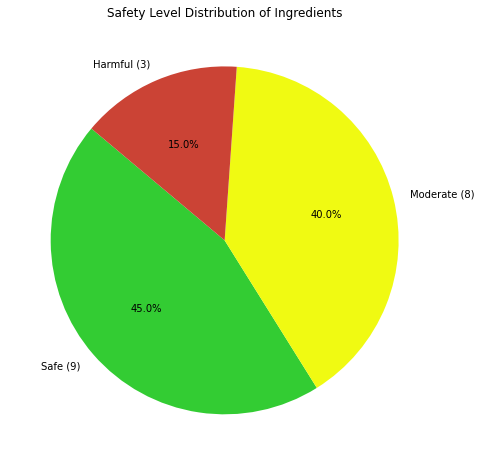

In [65]:
# Create a new column 'Safety Level' based on the specified ranges
ingredient_dataset['Safety Level'] = pd.cut(ingredient_dataset['Product Score'], bins=[0, 2, 6, 10], labels=['Safe', 'Moderate', 'Harmful'], right=False)

# Count the occurrences of each safety level
safety_counts = ingredient_dataset['Safety Level'].value_counts()

# Convert the index to strings for concatenation
safety_counts.index = safety_counts.index.astype(str)

# Pie chart
colors = [ '#33CC33','#F0FA12', '#CB4335']
plt.figure(figsize=(8, 8))
plt.pie(safety_counts, labels=safety_counts.index + ' (' + safety_counts.astype(str) + ')', autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Safety Level Distribution of Ingredients')
plt.show()

In [66]:
from tabulate import tabulate

# Assuming you have a DataFrame named 'ingredient_dataset'
# Extract the relevant columns
concern_columns = ['Cancer Concern', 'Allergies & Immunotoxicity', 'Developmental and Reproductive Toxicity', 'Use Restrictions']

# Create a new DataFrame with only the relevant columns
concern_df = ingredient_dataset[concern_columns]

# Count the occurrences of 'moderate' and 'high' in each column
count_df = concern_df.apply(lambda x: x.isin(['MODERATE', 'HIGH']).sum())

# Create a summary table
summary_table = pd.DataFrame({'Concern Category': count_df.index, 'Count': count_df.values})

# Display the summary table using tabulate
print(tabulate(summary_table, headers='keys', tablefmt='pretty', showindex=False))


+-----------------------------------------+-------+
|            Concern Category             | Count |
+-----------------------------------------+-------+
|             Cancer Concern              |   0   |
|       Allergies & Immunotoxicity        |   8   |
| Developmental and Reproductive Toxicity |   1   |
|            Use Restrictions             |  10   |
+-----------------------------------------+-------+


C:\Users\SAJJAD-PC\AppData\Local\Temp\ipykernel_26828\2296771010.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingredient_dataset['Safety Level'] = pd.cut(ingredient_dataset['Product Score'], bins=[0, 3, 7, 10], labels=['Safe', 'Moderate', 'Harmful'], right=False)


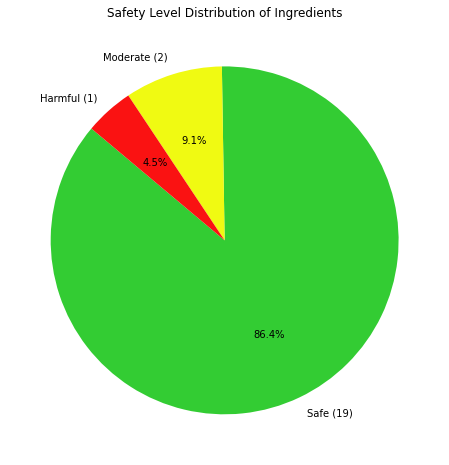

In [19]:
#FULL CODE
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import vision

# Authentication to Google API
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'vision_key.json'

# Read the dataset
df = pd.read_csv("ewg_data.csv")

def detect_text(path):
    """Detects text in the file."""
    client = vision.ImageAnnotatorClient()

    with open(path, "rb") as image_file:
        content = image_file.read()

    image = vision.Image(content=content)


    response = client.document_text_detection(image=image)
    texts = response.text_annotations
    ocr_text = [f"\r\n{text.description}" for text in texts]

    if response.error.message:
        raise Exception(response.error.message)

    return ocr_text

def extract_ingredients(ocr_lines):
    in_ingredients_section = False
    ingredient_words = []

    for line in ocr_lines:
        if 'INGREDIENTS:' in line:
            in_ingredients_section = True
            line = line.split('INGREDIENTS:')[1].strip()

        if in_ingredients_section and '.' in line:
            line = line.split('.')[0].strip()
            ingredient_words.extend([word.strip() for word in line.split(',')])
            break

        if in_ingredients_section:
            ingredient_words.extend([word.strip() for word in line.split(',')])

    return ingredient_words

def process_ingredients(ingredients):
    new_elements = []

    for element in ingredients:
        if "(AND)" in element:
            parts= element.split('(AND)')
            new_elements.extend(parts)

        elif '/' in element:
            parts = element.split('/')
            new_elements.extend(parts)
        else:
            new_elements.append(element)
        
    for i in range(len(new_elements)):
        new_elements[i] = new_elements[i].strip()

    return new_elements

def filter_ingredients(ingredients):
    filtered_dataset = df[df['Product Name'].isin(ingredients)]
    filtered_dataset.reset_index(drop=True, inplace=True)
    return filtered_dataset

def create_pie_chart(safety_counts):
    colors = [ '#33CC33','#F0FA12', '#FA1212']
    plt.figure(figsize=(8, 8))
    plt.pie(safety_counts, labels=safety_counts.index + ' (' + safety_counts.astype(str) + ')', autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title('Safety Level Distribution of Ingredients')
    plt.show()

def process_image_and_create_pie_chart(image_path):
    ocr_text = detect_text(image_path)
    ocr_text[0] = ocr_text[0].upper()
    ocr_text[0] = ocr_text[0].replace('\n', ' ')

    ocr_lines = ocr_text[0].split('\n')
    ingredient_words = extract_ingredients(ocr_lines)
    ingredients = process_ingredients(ingredient_words)

    ingredient_dataset = filter_ingredients(ingredients)

    # Create a new column 'Safety Level' based on the specified ranges
    ingredient_dataset['Safety Level'] = pd.cut(ingredient_dataset['Product Score'], bins=[0, 3, 7, 10], labels=['Safe', 'Moderate', 'Harmful'], right=False)

    # Count the occurrences of each safety level
    safety_counts = ingredient_dataset['Safety Level'].value_counts()

    # Convert the index to strings for concatenation
    safety_counts.index = safety_counts.index.astype(str)

    # Create the pie chart
    create_pie_chart(safety_counts)

# Example usage
image_path = "p9.jpg"
process_image_and_create_pie_chart(image_path)
